In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm 
from datetime import date 
from datetime import datetime

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
file_dir = '../'

data_dir = file_dir + 'test_data/'
result_dir = data_dir + 'results/'

In [3]:
# !pip install pyspellchecker

%load_ext autoreload
%autoreload 2

# %run '/content/drive/My Drive/Colab Data/public_app_analysis/utils/publicAnalysisHelper.py'
%run ../references/food_modelling_utils.py
%run ../foodparser/foodparser.py

[nltk_data] Downloading package words to /Users/joey-hou/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/joey-
[nltk_data]     hou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/joey-
[nltk_data]     hou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/joey-hou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# !pip install indexer

In [6]:
data_dir

'../test_data/'

# Loading food parser

In [7]:
fp = FoodParser()
# len(fp.all_gram_set)

In [8]:
# combined_df = pd.read_csv(data_dir + 'food_annotations/combined_df.csv')
# combined_df.head()

In [9]:
# food_type_dict = {}
# weird_keys = []
# for sett in fp.all_gram_set:
#     for key in sett:
#         if key not in combined_df.gram_key.values:
#             continue
#         if combined_df.query('gram_key == "' + key + '"').shape[0] == 1:
#             food_type_dict[key] = combined_df.query('gram_key == "' + key + '"').food_type.values[0]
#         else:
#             weird_keys.append(key)

In [10]:
# pd.DataFrame(weird_keys).to_csv('weird_keys.csv', index = False)

In [11]:
# 'yoghurt' in fp.all_gram_set[0]

- **After manual annotations**

In [12]:
# weird_csv = pd.read_csv(data_dir + 'food_annotations/weird_keys.csv')
# weird_csv.head()

In [13]:
# weird_csv.index = weird_csv.key
# weird_key_food_type_mask = dict(weird_csv.food_type)

In [14]:
# combined_df.food_type = combined_df.apply(lambda s: s.food_type if s.gram_key not in weird_key_food_type_mask.keys() else \
#                                          weird_key_food_type_mask[s.gram_key], axis = 1)

In [15]:
# combined_df = combined_df.drop_duplicates()
# combined_df.index = combined_df.gram_key
# food_type_dict = dict(combined_df.food_type)

In [16]:
# pickle.dump(food_type_dict, open(data_dir + 'food_annotations/final_database/food_type_dict.pickle', 'wb'))

In [17]:
# combined_df.food_type.unique()

In [18]:
# combined_df.food_type = combined_df.food_type.apply(lambda x: x.strip())
# combined_df.shape

In [19]:
# combined_df.to_csv(data_dir + 'food_annotations/final_database/combined_df.csv', index = False)

# Parse Public Food Data
## Load in raw data

In [20]:
public_all_pickle_file = open(data_dir + 'raw/public_0924_basline_usable_expanded.pickle', 'rb')
public_all = pickle.load(public_all_pickle_file)
public_all.head(2)

,ID,unique_code,research_info_id,desc_text,food_type,original_logtime,original_logtime_notz,day,local_time,time,week_from_start,year
281,282,alqt15090005,150,Water,w,09-09-2015 8:20PM JST,2015-09-09 20:20:00,2015-09-09,20.333333,20:20:00,1,2015
282,283,alqt15090005,150,Soup,f,09-09-2015 10:38PM JST,2015-09-09 22:38:00,2015-09-09,22.633333,22:38:00,1,2015


In [21]:
# public_all[['desc_text', 'food_type']].iloc[:10000].to_csv('~/Desktop/sample_data.csv', index = False)

In [22]:
# pickle.load(open(data_dir + 'public_app_analysis/data/public_0924_basline_usable_expanded.pickle', 'rb')).shape

In [23]:
public_all.shape # In baseline, there are 1,648,792 records

(1653926, 12)

In [29]:
sample_df = public_all.query('food_type in ["f", "b"]').sample(5000).reset_index(drop = True)

In [30]:
# fp = FoodParser()
# parsed = [fp.parse_food(i) for i in tqdm(public_all.desc_text.values)]

## **Initialized foodparser**

In [31]:
fp = FoodParser()
fp.initialization()
# fp.all_gram_set[0].add('yoghurt')

In [32]:
'yoghurt' in fp.all_gram_set[0]

True

In [33]:
'latte' in fp.all_gram_set[0]

True

## **Parsing**

In [34]:
total_unknown = 0
total_token = 0
parsed = []
total_unknown_tokens = []
counter = 0
for i in tqdm(range(sample_df.shape[0])):
    entry = sample_df.iloc[i].desc_text
    result, num_token, num_unknown, unknown_tokens = fp.parse_food(entry, return_sentence_tag = True)
    result = [(f, fp.find_food_type(f)) for f in result]
    parsed.append(result)
    total_token += num_token
    total_unknown += num_unknown
    total_unknown_tokens += unknown_tokens
    
#     counter += 1
#     if counter == 50:
#         break

100%|██████████| 5000/5000 [03:06<00:00, 26.76it/s]


In [ ]:
# total_unknown_tokens

## Catched tokens

In [ ]:
public_all_parsed = pd.DataFrame({
    'food_type': sample_df.food_type.values,
    'desc_text': sample_df.desc_text.values,
    'cleaned': parsed
})
public_all_parsed.head(2)

In [ ]:
public_all_parsed.to_csv(result_dir + 'public_all_parsed.csv', index = False)

In [40]:
print('Number of un-catched logging records:', len([lst for lst in parsed if len(lst) == 0])\
          , ', out of total entries of', len(parsed))
print('Proportion of un-catched logging records:', len([lst for lst in parsed if len(lst) == 0]) / len(parsed))

Number of un-catched logging records: 42119 , out of total entries of 500000
Proportion of un-catched logging records: 0.084238


## **Un-catched tokens**

In [19]:
total_unknown / total_token

0.2577997600323418

In [20]:
total_token

1541041

In [29]:
total_unknown_tokens = [s.strip() for s in total_unknown_tokens]

In [30]:
total_unknown_tokens[:20]

['lunch',
 'chef',
 'uttar vermicelli',
 'kara',
 'fermented soya',
 'x',
 'live',
 'liquorice',
 'organic',
 'bar',
 'daim bar',
 'white',
 'no',
 'snap',
 'melt',
 'extra light',
 'almondina',
 'granary',
 'smoked herring',
 'culotte rape']

In [31]:
len(total_unknown_tokens)

315061

In [32]:
pd.Series(total_unknown_tokens).value_counts().head(500).sum()

177530

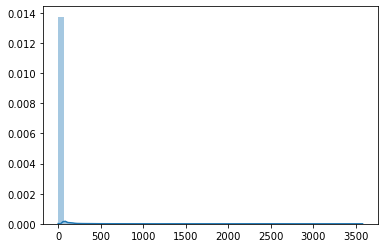

In [33]:
sns.distplot(pd.Series(total_unknown_tokens).value_counts())

In [35]:
uncatched_tokens = pd.DataFrame(pd.Series(total_unknown_tokens).value_counts(), columns = ['counts'])\
    .query('counts >= 50')
uncatched_tokens.head(20)

,counts
breakfast,3578
dinner,2989
deaf,2817
lunch,2799
white,2627
sauce,2606
herbal,2509
g,2442
red,2248
vegan,1970


In [54]:
unigram = []
bigram = []
for phrase in tqdm(total_unknown_tokens):
    if len(phrase) == 1:
        unigram.append(phrase)
    else:
        for bi in nltk.bigrams(phrase.split()):
            bigram.append(bi)

100%|██████████| 315061/315061 [00:00<00:00, 705533.98it/s]


In [52]:
total_unknown_tokens[2]

'uttar vermicelli'

In [53]:
list(nltk.bigrams(total_unknown_tokens[2].split()))

[('uttar', 'vermicelli')]

In [56]:
bigram[:3]

[('uttar', 'vermicelli'), ('fermented', 'soya'), ('daim', 'bar')]

In [57]:
cfreq_2gram = nltk.ConditionalFreqDist(bigram)

In [59]:
dict(cfreq_2gram)

{'uttar': FreqDist({'vermicelli': 2}),
 'fermented': FreqDist({'chickpea': 10, 'meet': 9, 'soya': 8, 'red': 8, 'beetroot': 6, 'veg': 3, 'vegan': 3, 'soy': 3, 'japanese': 2, 'soybean': 2, ...}),
 'daim': FreqDist({'bar': 3, 'sweet': 1}),
 'extra': FreqDist({'virgin': 185, 'light': 28, 'sharp': 13, 'shot': 11, 'crunchy': 10, 'strength': 8, 'large': 8, 'v': 5, 'strong': 4, 'mature': 3, ...}),
 'smoked': FreqDist({'mackerel': 36, 'gouda': 17, 'herring': 12, 'haddock': 12, 'paprika': 8, 'maureen': 2, 'brat': 2, 'gunda': 2, 'solomon': 2, 'kipper': 2, ...}),
 'culotte': FreqDist({'rape': 2, 'palate': 1}),
 'creme': FreqDist({'fraiche': 148, 'rule': 35, 'frail': 10, 'erythrit': 4, 'french': 3, 'glazed': 3, 'sauce': 2, 'pi': 2, "don'ts": 2, 'creche': 2, ...}),
 'fromage': FreqDist({'there': 14, 'blanc': 14, 'vache': 12, 'frail': 11, 'vegetal': 2, 'brevis': 1, 'cottage': 1}),
 'your': FreqDist({'nature': 4, 'grey': 1}),
 'nature': FreqDist({'valley': 68, 'path': 20, 'bakery': 5, 'vache': 4, 'bou

In [27]:
uncatched_tokens.to_csv(result_dir + 'uncatched_tokens.csv')

# Analysis on parsing result and the uncatched tokens

In [201]:
public_all_parsed.shape

(100000, 4)

In [204]:
f_count, f_lst = 0, []
b_count, b_lst = 0, []
o_count, o_lst = 0, []
for i in tqdm(range(public_all_parsed.shape[0])):
    food_lst = public_all_parsed.cleaned.values[i]
    for f in food_lst:
        if f[1] == 'f':
            f_count += 1
            f_lst.append(f[0])
        elif f[1] == 'b':
            b_count += 1
            b_lst.append(f[0])
        else:
            o_count += 1
            o_lst.append(f[0])

100%|██████████| 100000/100000 [00:00<00:00, 150478.24it/s]


In [205]:
f_count, b_count, o_count

(126936, 43748, 7096)

In [208]:
pd.Series(f_lst).value_counts(), pd.Series(b_lst).value_counts(), pd.Series(o_lst).value_counts()

(egg                     3900
 cheese                  3518
 chicken                 3096
 banana                  2814
 rice                    2514
                         ... 
 vegan oatmeal cookie       1
 turkey sandwich chip       1
 greek chicken salad        1
 baked veggie               1
 naan                       1
 Length: 579, dtype: int64,
 coffee                          9377
 tea                             4715
 salad                           3574
 milk                            3443
 black coffee                    1648
                                 ... 
 strawberry banana smoothie         1
 cold brew coffee almond milk       1
 irish tea                          1
 kombucha chia seed                 1
 sugar syrup                        1
 Length: 110, dtype: int64,
 chocolate            1927
 almond               1442
 water                1365
 orange                832
 yoghurt               671
 turmeric              302
 vitamin               275
 rose  

# Parse Firefighters Data

In [10]:
firefighter_data_pickle_file = open(data_dir + 'fire_fighter/FFFoodData_Unique_Time_All_Aug2020.pickle', 'rb')
firefighter_data = pickle.load(firefighter_data_pickle_file)
firefighter_data.head(2)

,PID,caloric,day,desc_text,food_type,local_time,original_logtime,original_logtime_notz,participant,study,time,tz
1,9bbi18050004,1,2018-07-18,kind bar && coffee,f,9.583333,07-18-2018 09:35AM PDT,2018-07-18 09:35:00,Hero-001,TRE,09:35:00,PDT
2,9bbi18050004,1,2018-06-24,potatoe,f,19.116667,06-24-2018 07:07PM PDT,2018-06-24 19:07:00,Hero-001,TRE,19:07:00,PDT


In [30]:
firefighter_data.query('food_type == "m"').shape

(1704, 13)

In [11]:
firefighter_data.shape

(109712, 12)

In [13]:
fp = FoodParser()

# fp.all_gram_set[0].add('yoghurt')

'yoghurt' in fp.all_gram_set[0]

True

In [14]:
sample_df = firefighter_data
if 'ID' not in sample_df:
    sample_df['ID'] = range(sample_df.shape[0])

total_unknown = 0
total_token = 0
parsed = []
total_unknown_tokens = []
for i in tqdm(range(sample_df.shape[0])):
    entry = sample_df.iloc[i].desc_text
    result, num_token, num_unknown, unknown_tokens = fp.parse_food(entry, return_sentence_tag = True)
    result = [(f, fp.find_food_type(f)) for f in result]
    parsed.append(result)
    total_token += num_token
    total_unknown += num_unknown
    total_unknown_tokens += unknown_tokens

100%|██████████| 109712/109712 [11:04<00:00, 165.08it/s]


In [15]:
total_unknown / total_token

0.1891221362609441

In [19]:
ff_all_parsed = pd.DataFrame({
    'ID': sample_df.ID,
    'food_type': sample_df.food_type.values,
    'desc_text': sample_df.desc_text.values,
    'cleaned': parsed
})
ff_all_parsed.head(2)

,ID,food_type,desc_text,cleaned
1,0,f,kind bar && coffee,"[(kind bar, f), (coffee, b)]"
2,1,f,potatoe,"[(potato, f)]"


In [20]:
uncatched_tokens = pd.DataFrame(pd.Series(total_unknown_tokens).value_counts(), columns = ['counts']).query('counts >= 50')
uncatched_tokens

,counts
reggie,1615
bar,1333
grandma,1157
quinta,929
sauce,814
...,...
fillet,50
pop,50
chopped,50
levothyroxine,50


In [21]:
f_count, f_lst = 0, []
b_count, b_lst = 0, []
o_count, o_lst = 0, []
for i in tqdm(range(ff_all_parsed.shape[0])):
    food_lst = ff_all_parsed.cleaned.values[i]
    for f in food_lst:
        if f[1] == 'f':
            f_count += 1
            f_lst.append(f[0])
        elif f[1] == 'b':
            b_count += 1
            b_lst.append(f[0])
        else:
            o_count += 1
            o_lst.append(f[0])

100%|██████████| 109712/109712 [00:00<00:00, 171793.79it/s]


In [22]:
f_count, b_count, o_count

(151181, 39300, 3224)

In [24]:
pd.Series(f_lst).value_counts()

egg                    6470
chicken                5236
avocado                3211
rice                   3159
banana                 3045
                       ... 
veggie pizza              1
veggie egg scramble       1
macadamia nut             1
machaca                   1
carne asada               1
Length: 649, dtype: int64

In [27]:
pd.Series(b_lst).value_counts()

coffee                                 7047
salad                                  5119
beer                                   2721
black coffee                           2130
smoothie                               1522
                                       ... 
mocha coffee                              3
iced coffee cream                         2
coffee soy creamer                        1
brew coffee                               1
coconut water thorne protein powder       1
Length: 130, dtype: int64

In [26]:
pd.Series(o_lst).value_counts()

water                    1089
vitamin                   538
fish oil                  184
lisinopril                167
glucosamine               138
multivitamin              132
gabapentin                131
turmeric                  119
red rice yeast pill       115
atarax                    112
calcium                    86
multi vit sport            74
prebiotic                  74
daily vitamin              67
calcium magnesium          55
black seed oil             50
adderall xr milligram      29
omega fish oil             24
magnesium                  12
red rice yeast             12
yoghurt                     9
red rice                    7
dtype: int64

# Perplexity experiment

In [28]:
sample_df.head(2)

,ID,unique_code,research_info_id,desc_text,food_type,original_logtime,original_logtime_notz,day,local_time,time,week_from_start,year
0,4854966,alqt181274638,150,Butter,b,01-01-2019 12:12PM PST,2019-01-01 12:12:00,2019-01-01,12.200000,12:12:00,2,2019
1,1007045,alqt170410520,150,Eggs,f,03-20-2018 07:19AM GMT+2,2018-03-20 07:19:00,2018-03-20,7.316667,07:19:00,51,2018


In [26]:
fp.all_gram_set[0]

{'acai',
 'ale',
 'alfredo',
 'almond',
 'americano',
 'apple',
 'artichoke',
 'arugala',
 'arugula',
 'asparagus',
 'atarax',
 'avocado',
 'bacon',
 'bagel',
 'bai',
 'balsamic',
 'banana',
 'bang',
 'barley',
 'basil',
 'bbq',
 'bean',
 'beef',
 'beer',
 'beet',
 'berry',
 'biscuit',
 'bison',
 'blackberry',
 'blueberry',
 'bran',
 'bratwurst',
 'bread',
 'brisket',
 'broccoli',
 'brownie',
 'brussel',
 'brussels',
 'bun',
 'burger',
 'burrito',
 'butter',
 'butterfat',
 'cabbage',
 'caffeine',
 'cake',
 'calamari',
 'calcium',
 'candy',
 'cantaloupe',
 'cappuccino',
 'caprese',
 'caramel',
 'carb',
 'carnitas',
 'carrot',
 'cashew',
 'cassava',
 'casserole',
 'cauliflower',
 'celery',
 'cereal',
 'ceviche',
 'chai',
 'chard',
 'cheddar',
 'cheerio',
 'cheese',
 'cheeseburger',
 'cheesecake',
 'cheetos',
 'cherry',
 'chia',
 'chicken',
 'chile',
 'chili',
 'chilli',
 'chip',
 'chipotle',
 'chocolate',
 'chorizo',
 'chowder',
 'cilantro',
 'cinnamon',
 'clam',
 'claritin',
 'clementin

In [29]:
raw_corpus = sample_df.desc_text.values
expaneded_corpus = []
for txt in tqdm(raw_corpus):
    unpacked = txt.split(',')
    if len(unpacked) > 1:
        expaneded_corpus += unpacked
    else:
        expaneded_corpus.append(txt)

100%|██████████| 500000/500000 [00:00<00:00, 784928.37it/s]


In [30]:
expaneded_corpus[:3]

['Butter', 'Eggs', 'Italian Sausage']

In [ ]:
all_multiword_text = [txt for txt in  and len(txt.split()) > 2]


In [ ]:
def clean_transcript(transcript):
    transcript = transcript.lower()
    transcript = re.sub(r'[^a-zA-Z0-9\s]', ' ', transcript)
    transcript = re.sub(r'\b\d+?\b', '', transcript)
    transcript = re.sub(r'\s+', ' ', transcript)
    return ' '.join(transcript.split())

corpus = ' '.join(train_df.abstract.values)
s = clean_transcript(corpus)
words = [token for token in tqdm(s.split()) \
         if token != "" and token not in string.punctuation and token not in stop_words]

word2freq = pd.Series(words).value_counts()

unknown_words = set(list(word2freq.loc[word2freq.apply(lambda s: s < 50)].index))

cfreq_2gram = nltk.ConditionalFreqDist(nltk.bigrams([w for w in words if w not in unknown_words]))
vocab_size = len(set(words) - unknown_words)

In [ ]:
def sentence_perplexity(sentence, model, vocab_size, word2freq):
    '''
    Perplexity score of a sentence:
        ps = ((1/p1) * (1/p2) * ... * (1/pn-1)) ^ (1/(N - 1))
        - pi: probability of i-th bigram
        - N: number of tokens in the sentence
    '''
    # sentence = clean_transcript(sentence)
    sentence = sentence.split()
    perplexity = 1
    
    # Check len(sentence)
    if len(sentence) == 1:
        return perplexity
    for i in range(len(sentence) - 1):
        try:
            numerator = model[sentence[i]][sentence[i + 1]] + 1
        except:
            numerator = 1
        try:
            denominator = word2freq[sentence[i]] + vocab_size
        except:
            denominator = vocab_size
        prob = numerator / denominator
        perplexity = perplexity * (1 / prob)
    perplexity = pow(perplexity, 1 / float(len(sentence) - 1)) 
    return perplexity